In [5]:
%matplotlib widget

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from bouter.free import FreelySwimmingExperiment
from pathlib import Path
from scipy.ndimage import generic_filter
from tqdm import tqdm
from scipy import signal
from scipy.signal import savgol_filter as sgf
import flammkuchen as fl
from scipy.ndimage import zoom
from scipy.stats import sem, wilcoxon, mannwhitneyu
import seaborn as sns
import random
from matplotlib import cm
from scipy.stats import zscore

In [7]:
def compute_temporal_pturn(df_,bins,th=np.deg2rad(30)):
    out_ = np.zeros(bins.shape[0]-1)
    t_start = df_["t_start"].values
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        bias = abs(df_["theta_start"].values[bouts_in_bin]-df_["theta_end"].values[bouts_in_bin])
        out_[n_bin] = np.sum(bias>=th) / bias.shape[0]
    return out_

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh) 

In [8]:
plt.rcParams.update({'font.size': 25})

In [9]:
intervals = [0,337,456,576,688,816,935,1200]
temp_intervals = [24,26,28,30,28,26,24]

In [10]:
master_path = Path(r"Z:\experiments\virtual_gradients_experiments\freely_swimming_lola")
list_files = list(master_path.glob("*_f*"))

In [11]:
datas = []
for i in tqdm(range(len(list_files[:-1]))):
    exp = FreelySwimmingExperiment(list_files[i])
    exp["stimulus"]["calibration_params"]["mm_px"] = 0.1
    exp["stimulus"]["calibration_params"]["cam_to_proj"] = np.eye(2)
    bouts = exp.get_bout_properties()
    datas.append(bouts)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [07:10<00:00,  9.78s/it]


In [9]:
temp_bins = np.array(intervals)
results = []
for data in datas:
    pturn = compute_temporal_pturn(data,temp_bins)
    results.append(pturn)
results = np.stack(results)

C:\Users\epaoli\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [11]:
bins_plot = (temp_bins[1:]+temp_bins[:-1])/2
mapped_color = np.interp(np.array(temp_intervals)-25.280104571722397,[-5,5],[0,1])

C:\Users\epaoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


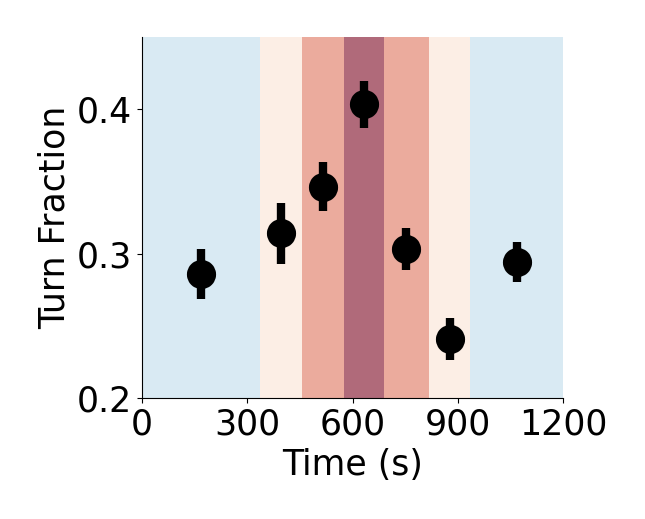

In [17]:
plt.figure()
i=0
for s_,e_ in zip(intervals[:-1],intervals[1:]):
    plt.axvspan(s_,e_,color=plt.cm.RdBu_r(mapped_color[i]),alpha=.6,lw=0)
    i+=1
plt.errorbar(bins_plot,np.nanmedian(results,0),yerr=sem(results,0,nan_policy="omit")*1.23,
            lw=6,fmt="o",ms=14,marker="o",mew=7,c="k",
            capthick=5)
plt.ylim([0.2,0.45])
plt.xlim([0,1200])
plt.xticks([0,300,600,900,1200],fontsize=25)
plt.yticks([.2,.3,.4],fontsize=25)
plt.ylabel("Turn Fraction",fontsize=25)
plt.xlabel("Time (s)",fontsize=25)
sns.despine()
set_size(5,4)
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\epaoli\Desktop\new_figs\supp_2_b.png",dpi=800)

In [8]:
intervals = [0,337,456,576,688,816,935,1200]
temp_intervals = [24,26,28,30,28,26,24]

In [9]:
intervals = np.array([337,576,688,935])

In [7]:
def compute_temporal_pturn(df_,bins,th=np.deg2rad(30)):
    out_ = np.zeros(bins.shape[0]-1)
    t_start = df_["t_start"].values.copy()
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        bias = abs(df_["theta_start"].values[bouts_in_bin]-df_["theta_end"].values[bouts_in_bin])
        out_[n_bin] = np.sum(bias>=th) / bias.shape[0]
    return out_

In [21]:
cxt_index = []
for data in datas:
    num_ = compute_temporal_pturn(data,intervals)
    index = num_[0] - num_[-1]
    cxt_index.append(index)
cxt_index = np.stack(cxt_index)

C:\Users\epaoli\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


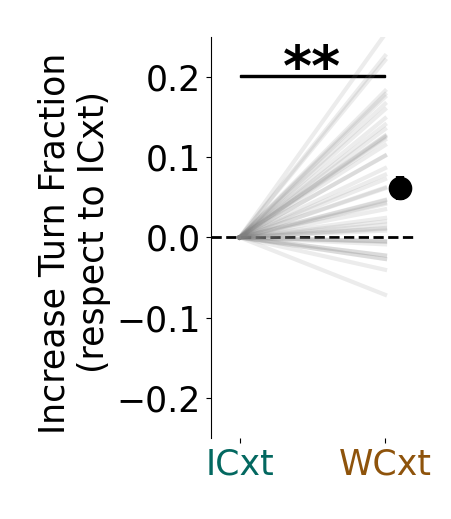

In [61]:
bins_center = np.array([1.1])
plt.figure()
plt.plot([-.2,1.2],[0,0],"--",color="k",lw=2)
plt.plot(np.stack([np.zeros(cxt_index.shape[0]),cxt_index]),c="gray",alpha=.15,lw=3)
plt.errorbar(bins_center,np.nanmedian(cxt_index,0),
             yerr=sem(cxt_index,0,nan_policy="omit")*1.23,
            lw=6,fmt="-",ms=10,marker="o",mew=7,c="k",
            capthick=5)

plt.axvspan(0,1,.9,.905,color="k")
plt.text(.3,0.19,"**",color="k",fontsize=40,fontweight="bold")

plt.ylabel("Increase Turn Fraction \n (respect to ICxt)",fontsize=25)
plt.xticks([0,1],["ICxt","WCxt"],fontsize=25)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), ["#036860","#8e530b"]):
    ticklabel.set_color(tickcolor)
plt.ylim([-.25,.25])
plt.yticks([-.2,-.1,0,.1,.2],fontsize=25)
plt.xlim([-.2,1.2])
sns.despine(bottom=True)
set_size(3.5,4)
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\epaoli\Desktop\new_figs\2_e.png",dpi=800)

In [21]:
temp_traces = []
for i in tqdm(range(len(list_files[:-1]))):
    exp = FreelySwimmingExperiment(list_files[i])
    trace = np.interp(np.linspace(0,3600,3600),exp.stimulus_log["t"],exp.stimulus_log["TEC_object_temperature"])
    temp_traces.append(trace)
temp_traces = np.stack(temp_traces)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:04<00:00,  9.13it/s]


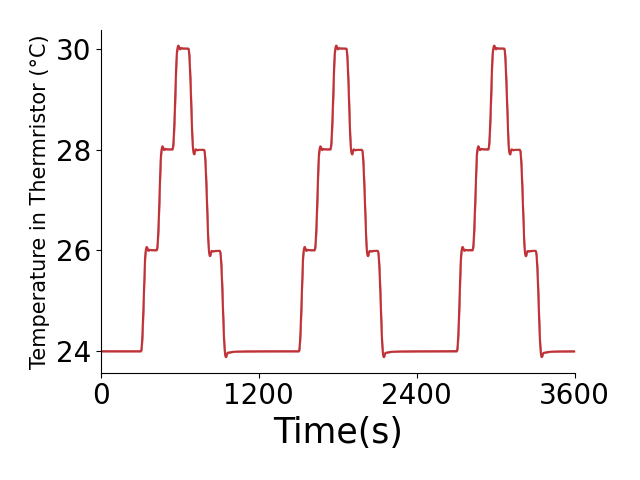

In [44]:
x_ = np.linspace(0,3600,3600)
plt.figure()
plt.plot(x_,np.nanmean(temp_traces,0),c=plt.cm.RdBu_r(220))
plt.fill_between(x_,np.nanmean(temp_traces,0)-sem(temp_traces,0),
                np.nanmean(temp_traces,0)+sem(temp_traces,0),alpha=.5,color=plt.cm.RdBu_r(220))
plt.ylabel("Temperature in Thermristor (°C)",fontsize=15)
plt.xlabel("Time(s)",fontsize=25)
plt.xticks([0,1200,1200*2,1200*3])
# plt.ylim([23,33])
plt.xlim([0,1200*3])
# plt.yticks([24,26,28,30,32])
sns.despine()
plt.tight_layout()
plt.show()

In [9]:
datas = []
for i in tqdm(range(len(list_files[:-1]))):
    exp = FreelySwimmingExperiment(list_files[i])
    exp["stimulus"]["calibration_params"]["mm_px"] = 0.1
    exp["stimulus"]["calibration_params"]["cam_to_proj"] = np.eye(2)
    bouts = exp.get_bout_properties()
    datas.append(bouts)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [11:11<00:00, 15.27s/it]


In [63]:
def spk_vect(t_events, events):
    zeros_vect = np.zeros(int(3600)*1000+1)
    new_time_vect = np.linspace(0,t_events[-1],int(t_events[-1])*1000)
    zeros_vect[t_events.astype(int)*1000] = events
    return new_time_vect,zeros_vect[:-1]

In [11]:
filter_size = 30
# turn_rates = []
# fwd_rates = []
# for data, path_ in tqdm(zip(datas,list_files[:-1])):
#     dict_ = fl.load(path_/"rates.h5")
#     thetas = data["theta_start"].values - data["theta_end"].values
# #     are_t = abs(thetas)>np.deg2rad(30)
# #     t_ev_bias, ev_ = spk_vect(data["t_start"].values[are_t],np.ones(np.sum(are_t)))
# #     t_rate = generic_filter(generic_filter(ev_,np.nansum,200*filter_size),np.nanmean,200*filter_size)
# #     turn_rates.append(t_rate)
#     are_f = abs(thetas)<=np.deg2rad(30)
#     t_ev_bias, ev_ = spk_vect(data["t_start"].values[are_f],np.ones(np.sum(are_f)))
#     f_rate = generic_filter(generic_filter(ev_,np.nansum,200*filter_size),np.nanmean,200*filter_size)
# #     fwd_rates.append(f_rate)
#     dict_["forward"] = f_rate
#     fl.save(path_/"rates.h5",dict_)

In [12]:
turn_rates = []
fwd_rates = []
for path_ in tqdm(list_files[:-1]):
    dict_ = fl.load(path_/"rates.h5")
    turn_rates.append(dict_["turn"])
    fwd_rates.append(dict_["forward"])

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:11<00:00,  3.68it/s]


In [67]:
time_vector_rates = np.linspace(0,3600, len(fwd_rates[1]))
array_f = zscore(np.stack(fwd_rates),1)
array_t = zscore(np.stack(turn_rates),1)
off_ = int(320*1000)
trials_avg = np.zeros((len(turn_rates),2,off_*2))
first_ramp = np.argmin(abs(time_vector_rates-621))
second_ramp = np.argmin(abs(time_vector_rates-1820))
third_ramp = np.argmin(abs(time_vector_rates-3020))
for i_fish in range(len(turn_rates)):

    trial_avg_t = np.nanmean(np.stack([zscore(turn_rates[i_fish][first_ramp-off_:first_ramp+off_]),
                                     zscore(turn_rates[i_fish][second_ramp-off_:second_ramp+off_]),
                                     zscore(turn_rates[i_fish][third_ramp-off_:third_ramp+off_])],0),0)
    
    trial_avg_f = np.nanmean(np.stack([zscore(fwd_rates[i_fish][first_ramp-off_:first_ramp+off_]),
                                     zscore(fwd_rates[i_fish][second_ramp-off_:second_ramp+off_]),
                                     zscore(fwd_rates[i_fish][third_ramp-off_:third_ramp+off_])],0),0)
    trials_avg[i_fish,0,:] =  trial_avg_t
    trials_avg[i_fish,1,:] =  trial_avg_f
time_vector_stim = np.linspace(0,640, 640)
time_vector_rates_plot = np.linspace(0,640, 640*1000)

C:\Users\ge59xan\miniconda3\envs\rplab\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


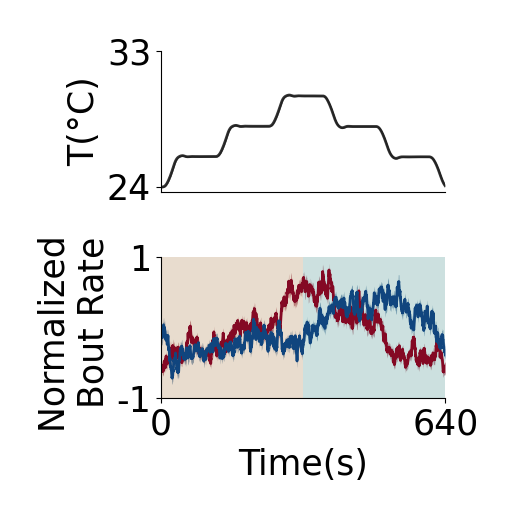

In [92]:
f,a = plt.subplots(2,1)

a[0].plot(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0),c="k",lw=2,alpha=.8)

a[0].fill_between(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0)-sem(temp_traces[:,621-320:621+320],0),
                np.nanmean(temp_traces[:,621-320:621+320],0)+sem(temp_traces[:,621-320:621+320],0),alpha=.3,color="k")

a[0].set_xlim([0,640])
a[0].set_xticks([])
a[0].set_yticks([24,33])
a[0].set_yticklabels([24,33], fontsize=25)
a[0].set_ylabel("T(°C)", fontsize=25)

a[1].plot(time_vector_rates_plot,np.nanmedian(trials_avg[:,0,:],0),color=cm.RdBu(10),lw=2)
a[1].fill_between(time_vector_rates_plot,
                  np.nanmedian(trials_avg[:,0,:],0)-(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                 np.nanmedian(trials_avg[:,0,:],0)+(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                  color=cm.RdBu(10),lw=0,alpha=.5)
a[1].plot(time_vector_rates_plot,np.nanmedian(trials_avg[:,1,:],0),color=cm.RdBu(245),lw=2)
a[1].fill_between(time_vector_rates_plot,
                  np.nanmedian(trials_avg[:,1,:],0)-(sem(trials_avg[:,1,:],0,0,nan_policy="omit")),
                 np.nanmedian(trials_avg[:,1,:],0)+(sem(trials_avg[:,1,:],0,0,nan_policy="omit")),
                  color=cm.RdBu(245),lw=0,alpha=.5)
a[1].axvspan(0,320,color="#8e530b",alpha=.2,lw=0)
a[1].axvspan(320,640,color="#036860",alpha=.2,lw=0)

a[1].set_xlim([0,640])
a[1].set_xticks([0,640])
a[1].set_yticklabels([0,640], fontsize=25)
a[1].set_ylim([-1,1])
a[1].set_yticks([-1,1])
a[1].set_yticklabels([-1,1], fontsize=25)
a[1].set_xlabel("Time(s)", fontsize=25)
a[1].set_ylabel("Normalized \n Bout Rate", fontsize=25)
set_size(4,4)
sns.despine()
plt.tight_layout()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\2_d_v04_new.png",dpi=800)
plt.show()

In [90]:
%matplotlib widget

C:\Users\epaoli\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
C:\Users\epaoli\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


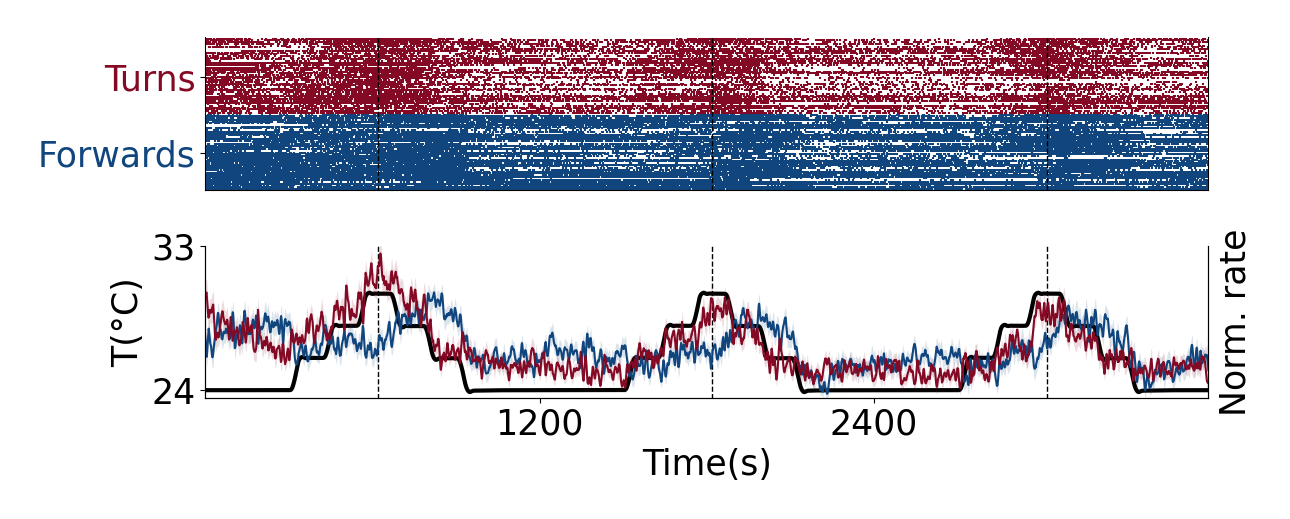

In [28]:
dot_lines = [621,1820,3020]
f,a = plt.subplots(2,1,figsize=(10,5))
off_ = 1

for l_ in dot_lines:
    a[0].plot([l_,l_],[.5,89],"--k",alpha=1,lw=1)
    
for data in datas:
    thetas = data["theta_start"].values - data["theta_end"].values
    are_f = abs(thetas)<=np.deg2rad(30)
    a[0].scatter(data["t_start"].values[are_f],np.ones(np.sum(are_f))*off_,
                color=cm.RdBu(245),marker="|",s=1.5)
    off_ += 1

for data in datas:
    thetas = data["theta_start"].values - data["theta_end"].values
    are_t = abs(thetas)>np.deg2rad(30)
    a[0].scatter(data["t_start"].values[are_t],np.ones(np.sum(are_t))*off_,
                color=cm.RdBu(10),marker="|",s=1.5)
    off_ += 1


a[0].set_xticks([])
a[0].set_ylim([0.5,89])
a[0].set_yticks([22,66])
a[0].set_yticklabels(["Forwards","Turns"])

for ticklabel, tickcolor in zip(a[0].get_yticklabels(), [cm.RdBu(245),cm.RdBu(10)]):
    ticklabel.set_color(tickcolor)

a[0].set_xlim([0,1200*3])
# a[0].set_xlabel("Time(s)")
# a[0].set_ylabel("Bout Events")

for l_ in dot_lines:
    a[1].plot([l_,l_],[23,33],"--k",alpha=1,lw=1)
    
x_ = np.linspace(0,3600,3600)
a[1].plot(x_,np.nanmean(temp_traces,0),c="k",lw=3)
a2 = a[1].twinx()
a2.fill_between(time_vector_rates,np.nanmean(array_f,0)-sem(array_f,0),
                np.nanmean(array_f,0)+sem(array_f,0),alpha=.15,color=cm.RdBu(245),lw=0)

a2.fill_between(time_vector_rates,np.nanmean(array_t,0)-sem(array_t,0),
                np.nanmean(array_t,0)+sem(array_t,0),alpha=.15,color=cm.RdBu(10),lw=0)

a2.plot(time_vector_rates, np.nanmean(array_f,0),c=cm.RdBu(245),lw=1.5)
a2.plot(time_vector_rates, np.nanmean(array_t,0),c=cm.RdBu(10),lw=1.5)
a2.set_ylabel("Norm. rate",fontsize=25)
a2.set_ylim([-.78,1.6])
a2.set_yticks([])
a[1].set_ylim([0,1])
# a[1].set_yticks([24,33])

a[1].fill_between(x_,np.nanmean(temp_traces,0)-sem(temp_traces,0),
                np.nanmean(temp_traces,0)+sem(temp_traces,0),alpha=.3,color="k")
a[1].set_ylabel("T(°C)",fontsize=25)
a[1].set_xlabel("Time(s)",fontsize=25)
a[1].set_xticks([1200,1200*2])
a[1].set_ylim([23.5,33])
a[1].set_xlim([0,1200*3])
a[1].set_yticks([24,33])

sns.despine(right=False)
set_size(10,4)
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\epaoli\Desktop\new_figs\2_d_v03.png",dpi=800)

### Motor correlation

In [200]:
def compute_temporal_pipsi(df_,bins,th=np.deg2rad(30)):
    out_ = np.zeros(bins.shape[0]-1)
    theta_each_bout = df_["theta_start"].values-df_["theta_end"].values
    two_cons_turns = abs(theta_each_bout[1:])>=th
    ipsi = theta_each_bout[1:][two_cons_turns]*np.sign(theta_each_bout[:-1][two_cons_turns])
    t_start = df_["t_start"].values[1:][two_cons_turns]
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        pipsi = np.nanmedian(ipsi[bouts_in_bin],0)
        out_[n_bin] = pipsi
    return out_

def compute_temporal_pipsi_rand(df_,bins,th=np.deg2rad(30), n_reps=20):
    out_final = []
    for _ in range(n_reps):
        out_ = np.zeros(bins.shape[0]-1)
        theta_each_bout = df_["theta_start"].values-df_["theta_end"].values
        two_cons_turns = abs(theta_each_bout[1:])>=th
        prev_rand = random.choices(np.array([-1,1]),np.array([.5,.5]),k=theta_each_bout[1:][two_cons_turns].shape[0])
        ipsi = theta_each_bout[:-1][two_cons_turns]*prev_rand
        t_start = df_["t_start"].values[1:][two_cons_turns]
        t_start[t_start>1200] -= 1200
        t_start[t_start>1200] -= 1200
        for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
            bouts_in_bin = (t_start>=start_)&(t_start<end_)
            pipsi = np.nanmedian(ipsi[bouts_in_bin],0)
            out_[n_bin] = pipsi
        out_final.append(out_)
    return np.stack(out_final,0).mean(0)

def compute_temporal_pipsiandtime(df_,bins,th=np.deg2rad(30), temporal_bins=np.linspace(0,30,3)):
    theta_each_bout = df_["theta_start"].values-df_["theta_end"].values
    two_cons_turns = (abs(theta_each_bout[:-1])>=th)
    ipsi = theta_each_bout[:-1][two_cons_turns]*np.sign(theta_each_bout[1:][two_cons_turns])
    t_start = df_["t_start"].values[1:][two_cons_turns]
    difft_with_prec = df_["t_start"][1:].values[two_cons_turns] - df_["t_start"].values[:-1][two_cons_turns]
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    

    bouts_in_bin = (t_start>=bins[0])&(t_start<bins[1])
    out_ = np.zeros((np.sum(bouts_in_bin),2))
    out_[:,0] = ipsi[bouts_in_bin]
    out_[:,1] = difft_with_prec[bouts_in_bin]
    
    fraction_ipsi = []
    num_events = []
    temporal_bins = np.linspace(.9,3.5,4)
    
    for s_,e_ in zip(temporal_bins[:-1],temporal_bins[1:]):
        in_bin = (out_[:,1] >= s_)&(out_[:,1] < e_)
        if np.sum(in_bin)>0:
#             num_ipsi = np.sum(out_[in_bin,0]>0) / np.sum(in_bin)
            num_ipsi = np.nanmedian(out_[in_bin,0])
            fraction_ipsi.append(num_ipsi)
            num_events.append(np.sum(in_bin))
        else:
            fraction_ipsi.append(np.nan)
            num_events.append(np.nan)
    
    return fraction_ipsi,num_events

In [201]:
intervals = np.array([337,576,688,935])

temp_bins = np.array(intervals)
ipsi_time_WT_T = []
num_events_time_WT_T = []
for data in datas:
    pipsiT,neT = compute_temporal_pipsiandtime(data,temp_bins)
    ipsi_time_WT_T.append(pipsiT)
    num_events_time_WT_T.append(neT)
ipsi_time_WT_T = np.stack(ipsi_time_WT_T,0)
num_events_time_WT_T = np.stack(num_events_time_WT_T,0)

In [205]:
for i in range(1,3):
    print(mannwhitneyu(ipsi_time_WT_T[:,0][np.isfinite(ipsi_time_WT_T[:,0])],
                       ipsi_time_WT_T[:,i][np.isfinite(ipsi_time_WT_T[:,i])])[1])

0.6372762057232441
0.022140138151088715


In [202]:
temporal_bins = np.linspace(.9,3.5,4)
bins_plot = (temporal_bins[:-1]+temporal_bins[1:])/2

C:\Users\ge59xan\miniconda3\envs\rplab\lib\site-packages\ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


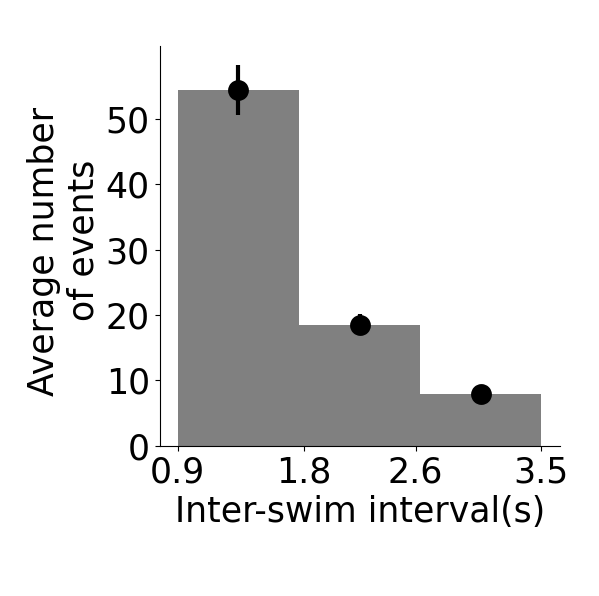

In [234]:
plt.figure()
plt.bar(bins_plot,
        np.nanmean(num_events_time_WT_T,0),
        color="gray", width=temporal_bins[1]-temporal_bins[0])
plt.errorbar(bins_plot,np.nanmean(num_events_time_WT_T,0),
             yerr=sem(num_events_time_WT_T,0,nan_policy="omit"),
            lw=3,fmt="o",ms=10,marker="o",mew=5,c="k",
            capthick=5)
plt.yticks([0,10,20,30,40,50], fontsize=25)
plt.ylabel("Average number \n of events", fontsize=25)
plt.xticks(np.round(temporal_bins,1),fontsize=25)
plt.xlabel("Inter-swim interval(s)", fontsize=25)
plt.tight_layout()
sns.despine()
set_size(4,4)
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev1_point1_2_lola.png",dpi=800)

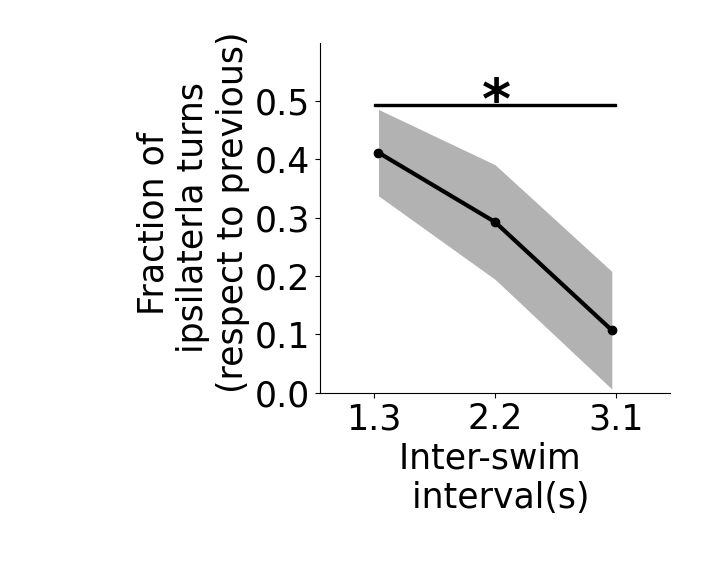

In [216]:
plt.figure(figsize=(5,5))
plt.fill_between(bins_plot,
                 np.nanmean(ipsi_time_WT_T,0)-sem(ipsi_time_WT_T,0,nan_policy="omit"),
                  np.nanmean(ipsi_time_WT_T,0)+sem(ipsi_time_WT_T,0,nan_policy="omit")
                ,color="k",alpha=.3,lw=0)
plt.plot(bins_plot,
        np.nanmean(ipsi_time_WT_T,0),"-o",
        color="k",lw=3)

plt.axvspan(1.3,3.1,.82,.825,color="k")
plt.text(2.1,.47,"*",color="k",fontsize=40,fontweight="bold")



plt.yticks([0,.1,.2,.3,.4,.5], fontsize=25)
plt.ylim([0,.6])
plt.xlim([.9,3.5])
plt.ylabel("Fraction of \n ipsilaterla turns \n (respect to previous)", fontsize=25)
plt.xticks(np.round(bins_plot,1),fontsize=25)
plt.xlabel("Inter-swim \n interval(s)", fontsize=25)
plt.tight_layout()
sns.despine()
set_size(3.5,3.5)
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev1_point1_3_lola.png",dpi=800)

In [251]:
pvals = []
for i in range(1,3):
    print(mannwhitneyu(ipsi_time_WT_T[:,0][np.isfinite(ipsi_time_WT_T[:,0])],
                       ipsi_time_WT_T[:,i][np.isfinite(ipsi_time_WT_T[:,i])])[1])

0.8022726305444808
0.04500549038455886


In [169]:
intervals = np.array([337,576,688,935])
temp_bins = np.array(intervals)
ipsi_index_WT = []
ipsi_index_WT_random = []
for data in datas:
    pipsi = compute_temporal_pipsi(data,temp_bins)
    pipsi_rand = compute_temporal_pipsi_rand(data,temp_bins)
    ipsi_index_WT.append(pipsi[0])
    ipsi_index_WT_random.append(pipsi_rand[0])
ipsi_index_WT = np.stack(ipsi_index_WT)
ipsi_index_WT_random = np.stack(ipsi_index_WT_random)

In [170]:
bins_plot = (temp_bins[1:]+temp_bins[:-1])/2
mapped_color = np.interp(np.array(temp_intervals)-25.280104571722397,[-5,5],[0,1])

In [68]:
np.nanmedian(results,0)

array([0.28591464, 0.31414474, 0.34650572, 0.40338102, 0.30308065,
       0.24109375, 0.29429809])

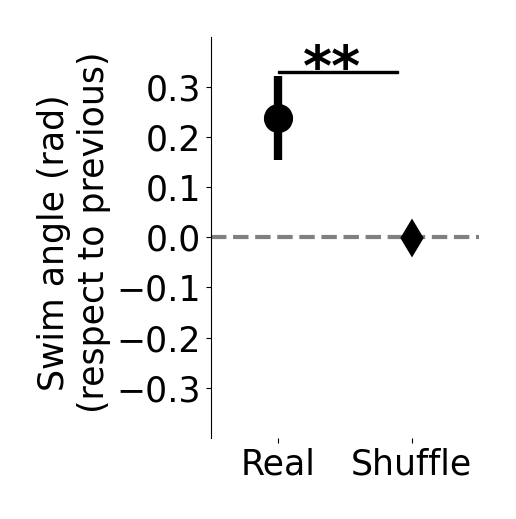

In [180]:
plt.figure(figsize=(3,5))
plt.plot([-3.5,-1.5],[0,0],"--",c="gray",lw=3)
to_plot = ipsi_index_WT.copy()
plt.errorbar([-3],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=14,marker="o",mew=7,c="k",
            capthick=5)

to_plot = ipsi_index_WT_random.copy()
plt.errorbar([-2],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=10,marker="d",mew=7,c="k",
            capthick=5)

plt.axvspan(-3,-2.1,.91,.915,color="k")
plt.text(-2.81,0.305,"**",color="k",fontsize=40,fontweight="bold")

plt.xlim([-3.5,-1.5])
plt.ylim([-0.4,.4])
plt.yticks([-.3,-.2,-.1,0,.1,.2,.3],fontsize=25)
plt.xticks([-3,-2],["Real","Shuffle"],fontsize=25)
plt.ylabel("Swim angle (rad) \n (respect to previous)",fontsize=25)
sns.despine(bottom=True)
set_size(4,4)
plt.tight_layout()
plt.show()
# plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\new_2f.png",dpi=800)

In [ ]:
intervals = np.array([337,576,688,935])
temp_bins = np.array(intervals)
ipsi_index_WT = []
ipsi_index_WT_random = []
for data in datas:
    pipsi = compute_temporal_pipsi(data,temp_bins)
    pipsi_rand = compute_temporal_pipsi_rand(data,temp_bins)
    ipsi_index_WT.append(pipsi[0])
    ipsi_index_WT_random.append(pipsi_rand[0])
ipsi_index_WT = np.stack(ipsi_index_WT)
ipsi_index_WT_random = np.stack(ipsi_index_WT_random)

In [175]:
print(mannwhitneyu(ipsi_index_WT,ipsi_index_WT_random)[1])

0.0033529363327929784


In [24]:
filter_size = 30
lock_rates_0 = []

for data, path_ in tqdm(zip(datas[1:],list_files[1:-1])):
    thetas = np.sign(data["theta_start"].values - data["theta_end"].values)
    
    are_lock = thetas[1:]==thetas[:-1]
    t_ev_bias, ev_ = spk_vect(data["t_start"].values[1:][are_lock],np.ones(np.sum(are_lock)))
    l_rate0 = generic_filter(generic_filter(ev_,np.nansum,200*filter_size),np.nanmean,200*filter_size)
    lock_rates_0.append(l_rate0)
    
#     fl.save(path_/"lock_rate.h5",{"rate0":l_rate0, "rate1":l_rate1, "rate2":l_rate2})

43it [15:22:21, 1287.01s/it]


In [47]:
time_vector_rates = np.linspace(0,3600, len(lock_rates_0[1]))
array_l = zscore(np.stack(lock_rates_0),1)
off_ = int(320*1000)
trials_avg = np.zeros((len(lock_rates_0),1,off_*2))
first_ramp = np.argmin(abs(time_vector_rates-621))
second_ramp = np.argmin(abs(time_vector_rates-1820))
third_ramp = np.argmin(abs(time_vector_rates-3020))
for i_fish in range(len(lock_rates_0)):

    trial_avg_l = np.nanmean(np.stack([zscore(lock_rates_0[i_fish][first_ramp-off_:first_ramp+off_]),
                                     zscore(lock_rates_0[i_fish][second_ramp-off_:second_ramp+off_]),
                                     zscore(lock_rates_0[i_fish][third_ramp-off_:third_ramp+off_])],0),0)
    trials_avg[i_fish,0,:] =  trial_avg_l
time_vector_stim = np.linspace(0,640, 640)


In [31]:
temp_traces = []
for i in tqdm(range(len(list_files[:-1]))):
    exp = FreelySwimmingExperiment(list_files[i])
    trace = np.interp(np.linspace(0,3600,3600),exp.stimulus_log["t"],exp.stimulus_log["TEC_object_temperature"])
    temp_traces.append(trace)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:06<00:00,  7.27it/s]


In [33]:
temp_traces = np.stack(temp_traces)

In [48]:
time_vector_rates_plot = np.linspace(0,640, 640*1000)

C:\Users\ge59xan\miniconda3\envs\rplab\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


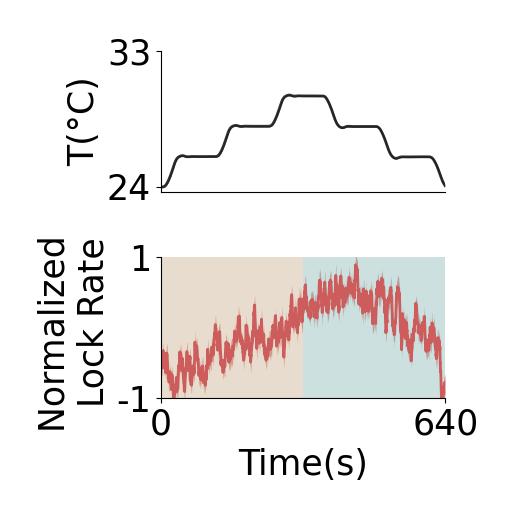

In [58]:
f,a = plt.subplots(2,1)

a[0].plot(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0),c="k",lw=2,alpha=.8)

a[0].fill_between(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0)-sem(temp_traces[:,621-320:621+320],0),
                np.nanmean(temp_traces[:,621-320:621+320],0)+sem(temp_traces[:,621-320:621+320],0),alpha=.3,color="k")

a[0].set_xlim([0,640])
a[0].set_xticks([])
a[0].set_yticks([24,33])
a[0].set_yticklabels([24,33], fontsize=25)
a[0].set_ylabel("T(°C)", fontsize=25)

a[1].plot(time_vector_rates_plot,np.nanmedian(trials_avg[:,0,:],0),color="indianred",lw=2)
a[1].fill_between(time_vector_rates_plot,
                  np.nanmedian(trials_avg[:,0,:],0)-(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                 np.nanmedian(trials_avg[:,0,:],0)+(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                  color="indianred",lw=0,alpha=.5)
a[1].axvspan(0,320,color="#8e530b",alpha=.2,lw=0)
a[1].axvspan(320,640,color="#036860",alpha=.2,lw=0)

a[1].set_xlim([0,640])
a[1].set_xticks([0,640])
a[1].set_yticklabels([0,640], fontsize=25)
a[1].set_ylim([-.6,.6])
a[1].set_yticks([-.6,.6])
a[1].set_yticklabels([-1,1], fontsize=25)
a[1].set_xlabel("Time(s)", fontsize=25)
a[1].set_ylabel("Normalized \n Lock Rate", fontsize=25)
set_size(4,4)
sns.despine()
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev2_point1_2_LolaLockRate.png",dpi=800)

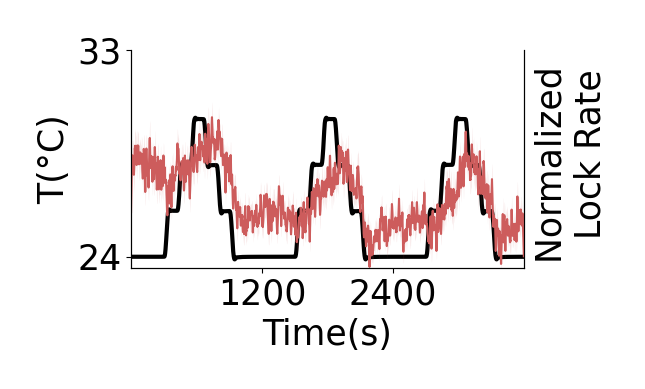

In [59]:
f,a = plt.subplots(1,1)
x_ = np.linspace(0,3600,3600)
a.plot(x_,np.nanmean(temp_traces,0),c="k",lw=3)
a2 = a.twinx()
a2.fill_between(time_vector_rates,np.nanmean(array_l,0)-sem(array_l,0),
                np.nanmean(array_l,0)+sem(array_l,0),alpha=.15,color="indianred",lw=0)


a2.plot(time_vector_rates, np.nanmean(array_l,0),c="indianred",lw=1.5)
a2.set_ylabel("Normalized \n Lock Rate",fontsize=25)
a2.set_ylim([-.78,1.6])
a2.set_yticks([])
a.set_ylim([0,1])
# a[1].set_yticks([24,33])

a.fill_between(x_,np.nanmean(temp_traces,0)-sem(temp_traces,0),
                np.nanmean(temp_traces,0)+sem(temp_traces,0),alpha=.3,color="k")
a.set_ylabel("T(°C)",fontsize=25)
a.set_xlabel("Time(s)",fontsize=25)
a.set_xticks([1200,1200*2])
a.set_ylim([23.5,33])
a.set_xlim([0,1200*3])
a.set_yticks([24,33])

sns.despine(right=False)
set_size(5,3)
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev2_point1_3_LolaLockRate_fullexp.png",dpi=800)

In [ ]:
np.array([337,576,688,935])

In [66]:
filter_size = 30
bout_rates = []

for data, path_ in tqdm(zip(datas[:],list_files[:-1])):
    thetas = np.sign(data["theta_start"].values - data["theta_end"].values)
    
    t_ev_bias, ev_ = spk_vect(data["t_start"].values[:],
                              np.ones(data["t_start"].values.shape[0]))
    b_rate = generic_filter(generic_filter(ev_,np.nansum,200*filter_size),np.nanmean,200*filter_size)
    bout_rates.append(b_rate)

44it [5:28:19, 447.71s/it]


In [65]:
f,a = plt.subplots(2,1)

a[0].plot(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0),c="k",lw=2,alpha=.8)

a[0].fill_between(time_vector_stim,np.nanmean(temp_traces[:,621-320:621+320],0)-sem(temp_traces[:,621-320:621+320],0),
                np.nanmean(temp_traces[:,621-320:621+320],0)+sem(temp_traces[:,621-320:621+320],0),alpha=.3,color="k")

a[0].set_xlim([0,640])
a[0].set_xticks([])
a[0].set_yticks([24,33])
a[0].set_yticklabels([24,33], fontsize=25)
a[0].set_ylabel("T(°C)", fontsize=25)

a[1].plot(time_vector_rates_plot,np.nanmedian(trials_avg[:,0,:],0),color="indianred",lw=2)
a[1].fill_between(time_vector_rates_plot,
                  np.nanmedian(trials_avg[:,0,:],0)-(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                 np.nanmedian(trials_avg[:,0,:],0)+(sem(trials_avg[:,0,:],0,0,nan_policy="omit")),
                  color="indianred",lw=0,alpha=.5)
a[1].axvspan(0,320,color="#8e530b",alpha=.2,lw=0)
a[1].axvspan(320,640,color="#036860",alpha=.2,lw=0)

a[1].set_xlim([0,640])
a[1].set_xticks([0,640])
a[1].set_yticklabels([0,640], fontsize=25)
a[1].set_ylim([-.6,.6])
a[1].set_yticks([-.6,.6])
a[1].set_yticklabels([-1,1], fontsize=25)
a[1].set_xlabel("Time(s)", fontsize=25)
a[1].set_ylabel("Normalized \n Lock Rate", fontsize=25)
set_size(4,4)
sns.despine()
plt.tight_layout()
plt.show()

TypeError: spk_vect() missing 1 required positional argument: 'events'

In [92]:
def compute_temporal_plock(df_,bins):
    out_ = np.zeros(bins.shape[0]-1)
    t_start = df_["t_start"].values[1:].copy()
    
    thetas = df_["theta_start"].values - df_["theta_end"].values
    lock = (np.sign(thetas)[1:] == np.sign(thetas)[:-1])*1
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        lock_fraction = np.sum(lock[bouts_in_bin]==1) / np.sum(bouts_in_bin)
        out_[n_bin] = lock_fraction
    return out_

In [73]:
intervals = [0,337,456,576,688,816,935,1200]
temp_intervals = [24,26,28,30,28,26,24]

In [93]:
temp_bins = np.array(intervals)
results = []
for data in datas:
    pturn = compute_temporal_plock(data,temp_bins)
    results.append(pturn)
results = np.stack(results)

In [94]:
bins_plot = (temp_bins[1:]+temp_bins[:-1])/2
mapped_color = np.interp(np.array(temp_intervals)-25.280104571722397,[-5,5],[0,1])

In [163]:
def compute_temporal_pipsi(df_,bins,th=np.deg2rad(30)):
    out_ = np.zeros(bins.shape[0]-1)
    theta_each_bout = df_["theta_start"].values-df_["theta_end"].values
    two_cons_turns = abs(theta_each_bout[1:])>=th
    ipsi = theta_each_bout[1:][two_cons_turns]*np.sign(theta_each_bout[:-1][two_cons_turns])
    t_start = df_["t_start"].values[1:][two_cons_turns]
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        pipsi = np.nanmedian(ipsi[bouts_in_bin],0)
        out_[n_bin] = pipsi
    return out_

In [164]:
intervals = np.array([337,576,688,935])
temp_bins = np.array(intervals)
ipsi_index_WT_Wcxt = []
ipsi_index_WT_Icxt = []
for data in datas:
    pipsi = compute_temporal_pipsi(data,temp_bins)
    
    ipsi_index_WT_Wcxt.append(pipsi[0])
    ipsi_index_WT_Icxt.append(pipsi[-1])
ipsi_index_WT_Wcxt = np.stack(ipsi_index_WT_Wcxt)
ipsi_index_WT_Icxt = np.stack(ipsi_index_WT_Icxt)

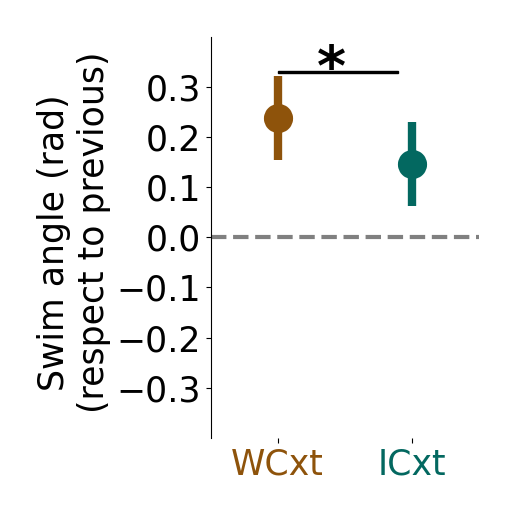

In [165]:
plt.figure(figsize=(3,5))
plt.plot([-3.5,-1.5],[0,0],"--",c="gray",lw=3)
to_plot = ipsi_index_WT_Wcxt.copy()
plt.errorbar([-3],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=14,marker="o",mew=7,c="#8e530b",
            capthick=5)

to_plot = ipsi_index_WT_Icxt.copy()
plt.errorbar([-2],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=14,marker="o",mew=7,c="#036860",
            capthick=5)

plt.axvspan(-3,-2.1,.91,.915,color="k")
plt.text(-2.71,0.305,"*",color="k",fontsize=40,fontweight="bold")

plt.xlim([-3.5,-1.5])
plt.ylim([-0.4,.4])
plt.yticks([-.3,-.2,-.1,0,.1,.2,.3],fontsize=25)
plt.xticks([-3,-2],["WCxt","ICxt"],fontsize=25)
plt.ylabel("Swim angle (rad) \n (respect to previous)",fontsize=25)
plt.xticks([-3,-2],["WCxt","ICxt"],fontsize=25)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), ["#8e530b","#036860"]):
    ticklabel.set_color(tickcolor)
sns.despine(bottom=True)
set_size(4,4)
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev2_point1_4_LolaWCxtICxt.png",dpi=800)

In [134]:
print(mannwhitneyu(ipsi_index_WT_Wcxt,ipsi_index_WT_Icxt)[1])

0.05653283934081016


In [185]:
def compute_temporal_pipsi2(df_,bins):
    out_ = np.zeros(bins.shape[0]-1)
    theta_each_bout = df_["theta_start"].values-df_["theta_end"].values
    ipsi = (np.sign(theta_each_bout[1:][:])==np.sign(theta_each_bout[:-1][:]))*1
    t_start = df_["t_start"].values[1:][:]
    t_start[t_start>1200] -= 1200
    t_start[t_start>1200] -= 1200
    for n_bin,(start_,end_) in enumerate(zip(bins[:-1],bins[1:])):
        bouts_in_bin = (t_start>=start_)&(t_start<end_)
        pipsi = np.sum(ipsi[bouts_in_bin]) / np.sum(bouts_in_bin)
        out_[n_bin] = pipsi
    return out_

In [186]:
intervals = np.array([337,576,688,935])
temp_bins = np.array(intervals)
ipsi_index_WT_Wcxt = []
ipsi_index_WT_Icxt = []
for data in datas:
    pipsi = compute_temporal_pipsi2(data,temp_bins)
    
    ipsi_index_WT_Wcxt.append(pipsi[0])
    ipsi_index_WT_Icxt.append(pipsi[-1])
ipsi_index_WT_Wcxt = np.stack(ipsi_index_WT_Wcxt)
ipsi_index_WT_Icxt = np.stack(ipsi_index_WT_Icxt)

C:\Users\ge59xan\miniconda3\envs\rplab\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


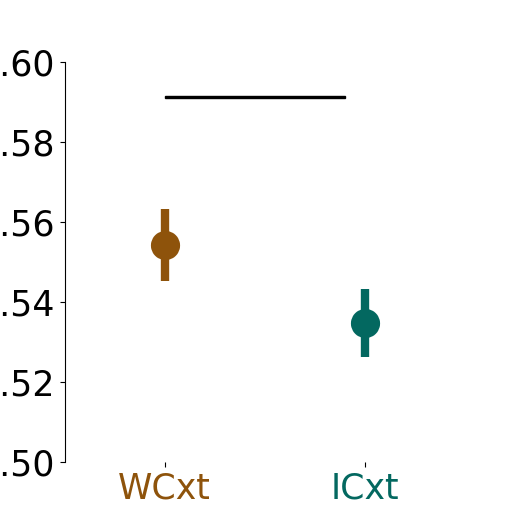

In [191]:
plt.figure(figsize=(3,5))
plt.plot([-3.5,-1.5],[0,0],"--",c="gray",lw=3)
to_plot = ipsi_index_WT_Wcxt.copy()
plt.errorbar([-3],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=14,marker="o",mew=7,c="#8e530b",
            capthick=5)

to_plot = ipsi_index_WT_Icxt.copy()
plt.errorbar([-2],y=np.array([np.nanmean(to_plot)]),
            yerr=sem(to_plot,nan_policy="omit"),
            lw=6,fmt="-",ms=14,marker="o",mew=7,c="#036860",
            capthick=5)

plt.axvspan(-3,-2.1,.91,.915,color="k")
plt.text(-2.71,0.305,"*",color="k",fontsize=40,fontweight="bold")

plt.xlim([-3.5,-1.5])
plt.ylim([0.5,.6])
plt.yticks([.5,.55,.6],fontsize=25)
plt.xticks([-3,-2],["WCxt","ICxt"],fontsize=25)
plt.ylabel("Swim angle (rad) \n (respect to previous)",fontsize=25)
plt.xticks([-3,-2],["WCxt","ICxt"],fontsize=25)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), ["#8e530b","#036860"]):
    ticklabel.set_color(tickcolor)
sns.despine(bottom=True)
set_size(4,4)
plt.tight_layout()
plt.show()
# plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\figures_reviews\rev2_point1_4_LolaWCxtICxt.png",dpi=800)

In [193]:
print(wilcoxon(ipsi_index_WT_Wcxt,ipsi_index_WT_Icxt)[1])

0.007795434243492074
